In [ ]:
%cd /content
%mkdir dl_a1

/content


In [ ]:
 %cd /content/dl_a1
!wget https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2


/content/dl_a1
--2025-02-23 17:31:35--  https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2
Resolving data.keithito.com (data.keithito.com)... 169.150.236.104, 2400:52e0:1a00::845:1
Connecting to data.keithito.com (data.keithito.com)|169.150.236.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2748572632 (2.6G) [text/plain]
Saving to: ‘LJSpeech-1.1.tar.bz2’

LJSpeech-1.1.tar.bz 100%[===================>]   2.56G   150MB/s    in 32s     

2025-02-23 17:32:07 (82.2 MB/s) - ‘LJSpeech-1.1.tar.bz2’ saved [2748572632/2748572632]



In [ ]:
%cd /content/dl_a1
!tar -xvjf LJSpeech-1.1.tar.bz2

Streaming output truncated to the last 5000 lines.
LJSpeech-1.1/wavs/LJ022-0089.wav
LJSpeech-1.1/wavs/LJ030-0192.wav
LJSpeech-1.1/wavs/LJ041-0078.wav
LJSpeech-1.1/wavs/LJ045-0249.wav
LJSpeech-1.1/wavs/LJ034-0035.wav
LJSpeech-1.1/wavs/LJ010-0152.wav
LJSpeech-1.1/wavs/LJ036-0174.wav
LJSpeech-1.1/wavs/LJ035-0076.wav
LJSpeech-1.1/wavs/LJ032-0176.wav
LJSpeech-1.1/wavs/LJ046-0113.wav
LJSpeech-1.1/wavs/LJ017-0096.wav
LJSpeech-1.1/wavs/LJ004-0098.wav
LJSpeech-1.1/wavs/LJ010-0147.wav
LJSpeech-1.1/wavs/LJ042-0230.wav
LJSpeech-1.1/wavs/LJ041-0033.wav
LJSpeech-1.1/wavs/LJ045-0229.wav
LJSpeech-1.1/wavs/LJ014-0199.wav
LJSpeech-1.1/wavs/LJ002-0082.wav
LJSpeech-1.1/wavs/LJ006-0055.wav
LJSpeech-1.1/wavs/LJ045-0120.wav
LJSpeech-1.1/wavs/LJ050-0028.wav
LJSpeech-1.1/wavs/LJ045-0215.wav
LJSpeech-1.1/wavs/LJ013-0121.wav
LJSpeech-1.1/wavs/LJ008-0025.wav
LJSpeech-1.1/wavs/LJ005-0240.wav
LJSpeech-1.1/wavs/LJ044-0026.wav
LJSpeech-1.1/wavs/LJ048-0127.wav
LJSpeech-1.1/wavs/LJ006-0195.wav
LJSpeech-1.1/wavs/LJ030-0

In [ ]:
!pip install torchaudio librosa boto3

import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import os
import pandas as pd

dataset_path = "/content/dl_a1/LJSpeech-1.1"
metadata_file = os.path.join(dataset_path, "/content/dl_a1/LJSpeech-1.1/metadata.csv")
audio_dir = os.path.join(dataset_path, "wavs")

metadata = pd.read_csv(metadata_file, sep="|", header=None, names=["file_id", "transcription", "normalized_transcription"])

print(metadata.head())

      file_id                                      transcription  \
0  LJ001-0001  Printing, in the only sense with which we are ...   
1  LJ001-0002                     in being comparatively modern.   
2  LJ001-0003  For although the Chinese took impressions from...   
3  LJ001-0004  produced the block books, which were the immed...   
4  LJ001-0005  the invention of movable metal letters in the ...   

                            normalized_transcription  
0  Printing, in the only sense with which we are ...  
1                     in being comparatively modern.  
2  For although the Chinese took impressions from...  
3  produced the block books, which were the immed...  
4  the invention of movable metal letters in the ...  


Audio Shape: (212893,), Sample Rate: 22050


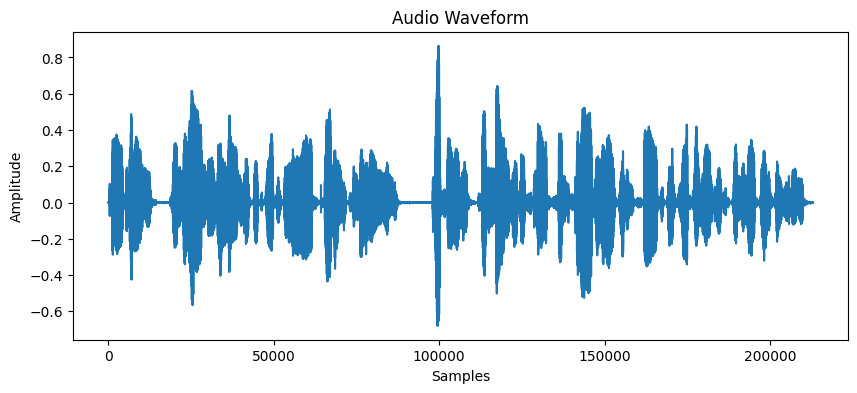

In [ ]:
import librosa
import matplotlib.pyplot as plt

# # Load an audio file
audio_path = os.path.join(audio_dir, "/content/dl_a1/LJSpeech-1.1/wavs/LJ001-0001.wav")
audio, sr = librosa.load(audio_path, sr=None)

# # Print audio details
print(f"Audio Shape: {audio.shape}, Sample Rate: {sr}")

# # Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(audio)
plt.title("Audio Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Slicing (extract first 2 seconds)
duration_to_slice = 2  # seconds
num_samples_to_slice = int(duration_to_slice * sr)
sliced_audio = audio[:num_samples_to_slice]

In [ ]:
# Normalization
normalized_audio = librosa.util.normalize(audio)

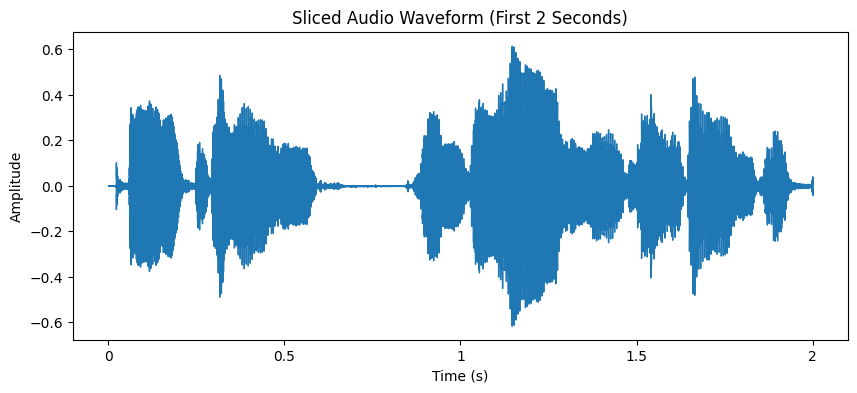

In [ ]:
# Plotting the sliced signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(sliced_audio, sr=sr)
plt.title("Sliced Audio Waveform (First 2 Seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

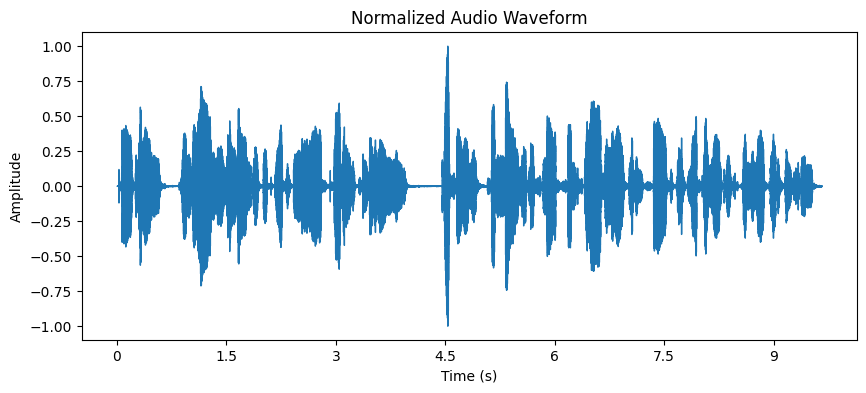

In [ ]:
# Plotting the normalized signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(normalized_audio, sr=sr)
plt.title("Normalized Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# # Load an audio file
audio_path = os.path.join(audio_dir, "/content/dl_a1/LJSpeech-1.1/wavs/LJ001-0002.wav")
audio, sr = librosa.load(audio_path, sr=None)


In [ ]:
# Amplification (increase amplitude by a factor of 2)
amplified_audio = audio * 2

In [ ]:
# De-amplification (decrease amplitude by a factor of 0.5)
deamplified_audio = audio * 0.5


In [ ]:

# Upsampling
upsampled_audio = librosa.resample(audio, orig_sr=sr, target_sr=sr * 2)

In [ ]:
# Downsampling
downsampled_audio = librosa.resample(audio, orig_sr=sr, target_sr=sr // 2)

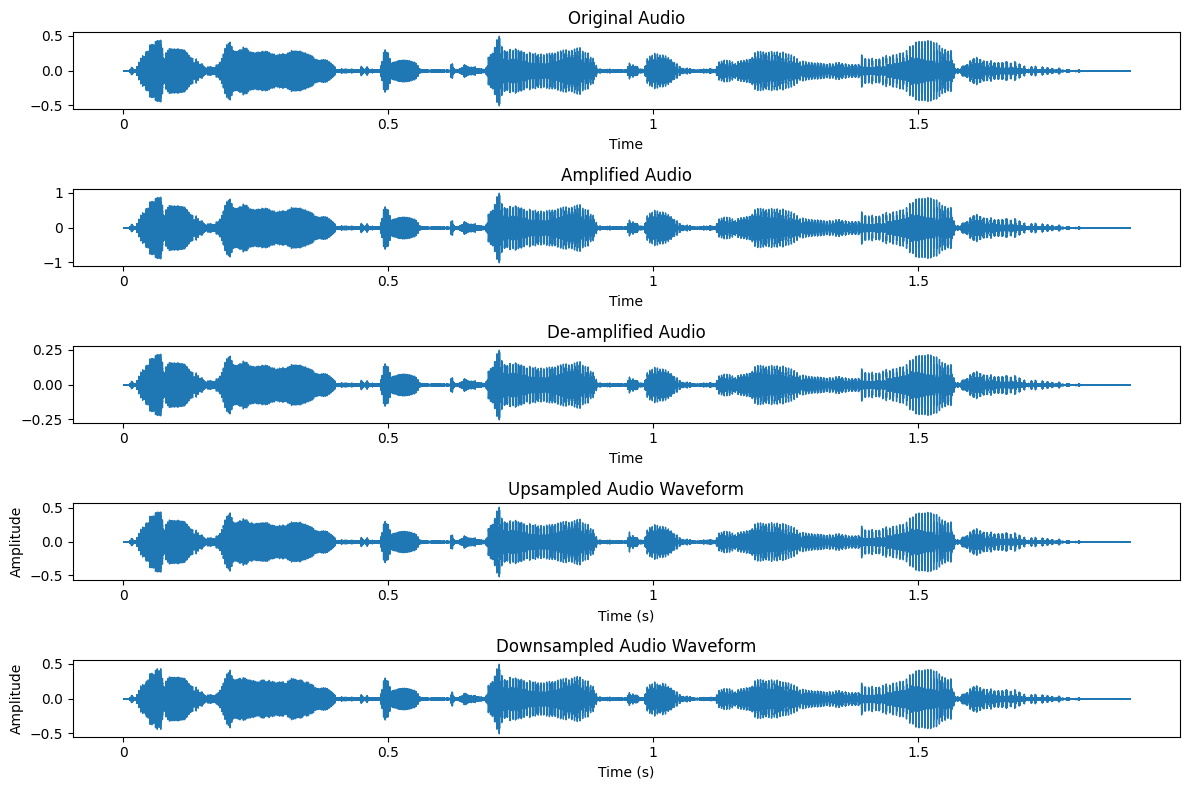

In [ ]:
# Plot th waveforms
plt.figure(figsize=(12, 8))

plt.subplot(5, 1, 1)
librosa.display.waveshow(audio, sr=sr)
plt.title("Original Audio")

plt.subplot(5, 1, 2)
librosa.display.waveshow(amplified_audio, sr=sr)
plt.title("Amplified Audio")

plt.subplot(5, 1, 3)
librosa.display.waveshow(deamplified_audio, sr=sr)
plt.title("De-amplified Audio")

# Plotting the upsampled signal
plt.subplot(5, 1, 4)
librosa.display.waveshow(upsampled_audio, sr=sr*2)
plt.title("Upsampled Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")


# Plotting the downsampled signal
plt.subplot(5, 1, 5)
librosa.display.waveshow(downsampled_audio, sr=sr//2)
plt.title("Downsampled Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")


plt.tight_layout()
plt.show()